<a href="https://colab.research.google.com/github/mbc2009/Inferno/blob/main/AISI/Soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mbc2009/Inferno/blob/main/Soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import networkx as nx
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

**TOC**<a id='toc0_'></a>    
1. [Q3](#toc1_)    
1.1. [a](#toc1_1_)    
1.1.1. [Principle of Operation](#toc1_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

---
# Q1: Tight-binding (TB)

## a.

Assume the lattice is periodic with uniform spacing $ a $, and each unit cell contains one atom.

**Hamiltonian Setup**:

The Hamiltonian in the TB approximation for a 1D chain is:
$$
H =
\sum_n
\epsilon_0
c_n^\dagger
c_n - t
\sum_n
(c_{n+1}^\dagger c_n +
c_n^\dagger c_{n+1}),
$$
where $ \epsilon_0 $ is the on-site energy, $ t $ is the hopping parameter (positive for attractive interaction), and $ c_n^\dagger, c_n $ are creation and annihilation operators for site $ n $.

**Bloch Theorem**:
Assume a Bloch wavefunction
$$
\psi_k(n) = e^{ika} u_k(n),
$$
where $k$ is the crystal momentum and $a$ is the lattice constant.

The wave function at site $n$ is
$$
\psi_n = \frac{1}{\sqrt{N}} \sum_k c_k e^{ikan},
$$
with $ N $ being the number of unit cells.


**Schrödinger Equation**:

The TB equation for site $ n $ is:
$$
\epsilon_0 c_n - t (c_{n+1} + c_{n-1}) = E c_n.
$$

Substituting the Bloch form $ c_n = e^{ika} c_0 $, we get:
$$
\epsilon_0 c_0 - t (e^{ika} c_0 + e^{-ika} c_0) = E c_0,
$$
simplifying to:
$$
E(k) = \epsilon_0 - 2t \cos(ka).
$$
This is the dispersion relation, where $ E(k) $ is the energy band.


**Band Structure**:

The first Brillouin zone is $ -\pi/a \leq k \leq \pi/a $.

Energy ranges from $ \epsilon_0 - 2t $ (at $ k = 0 $) to $ \epsilon_0 + 2t $ (at $ k = \pm \pi/a $), forming a single band.

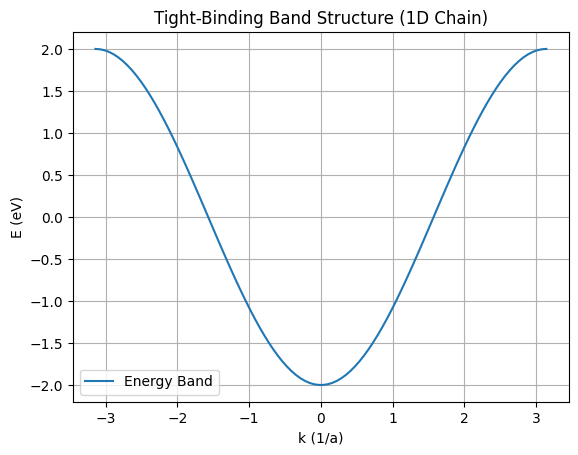

In [1]:
# Parameters
a = 1.0  # lattice constant (arbitrary units)
epsilon0 = 0.0  # on-site energy (arbitrary units)
t = 1.0  # hopping parameter (arbitrary units)
k_points = np.linspace(-np.pi/a, np.pi/a, 100)  # k-points in Brillouin zone

# Energy dispersion
E_k = epsilon0 - 2 * t * np.cos(k_points * a)

# Plot
plt.plot(k_points, E_k, label='Energy Band')
plt.xlabel('k (1/a)')
plt.ylabel('E (eV)')
plt.title('Tight-Binding Band Structure (1D Chain)')
plt.legend()
plt.grid(True)
plt.show()

---
## b.

For a 1D periodic chain with uniform spacing $a$, where each unit cell contains two distinct atoms (blue and red, labeled A and B).
We assume one orbital per atom, neglect spin, and consider only nearest-neighbor interactions.


**Hamiltonian Setup**

Each unit cell $ n $ has two atoms: A at position $ na $ and B at position $ na + \frac{a}{2} $.

On-site energies: $ \epsilon_A $ for atom A, $ \epsilon_B $ for atom B.

Hopping parameter: $ t $ (same between A-B and B-A due to symmetry).

The Hamiltonian is:
$$
H =
\sum_n \epsilon_A a_n^\dagger a_n + \epsilon_B b_n^\dagger b_n - t \sum_n (a_n^\dagger b_n + b_n^\dagger a_n + b_n^\dagger a_{n+1} + a_{n+1}^\dagger b_n),
$$
where $ a_n^\dagger, a_n $ and $ b_n^\dagger, b_n $ are creation/annihilation operators for atoms A and B in the $ n $-th cell.


**Bloch Theorem**

The wavefunction for atoms A and B in the $ n $-th cell is:
$$
| \psi \rangle = \sum_n \left( \psi_{A,n} | n, A \rangle + \psi_{B,n} | n, B \rangle \right),
$$
with Bloch form $ \psi_{A,n} = \psi_A e^{ikna} $, $ \psi_{B,n} = \psi_B e^{ikna} e^{ika/2} $ (adjusting for the position of B within the cell).


**Schrödinger Equation**

For atom A in cell $ n $:
$$
\epsilon_A \psi_{A,n} - t (\psi_{B,n} + \psi_{B,n-1}) = E \psi_{A,n}.
$$

For atom B in cell $ n $:
$$
\epsilon_B \psi_{B,n} - t (\psi_{A,n} + \psi_{A,n+1}) = E \psi_{B,n}.
$$

Substituting the Bloch forms:
$$
\epsilon_A \psi_A - t \psi_B (1 + e^{-ika}) = E \psi_A,
$$
$$
\epsilon_B \psi_B - t \psi_A (1 + e^{ika}) = E \psi_B.
$$

This gives a 2$\times$2 matrix equation:
$$
\begin{pmatrix}
\epsilon_A - E & -t (1 + e^{-ika}) \\
-t (1 + e^{ika}) & \epsilon_B - E
\end{pmatrix}
\begin{pmatrix}
\psi_A \\
\psi_B
\end{pmatrix} = 0.
$$



**Energy Dispersion**

For a non-trivial solution, the determinant must be zero:
$$
(\epsilon_A - E)(\epsilon_B - E) - t^2 (1 + e^{-ika})(1 + e^{ika}) = 0.
$$

Simplify: $ (1 + e^{-ika})(1 + e^{ika}) = 2 + 2\cos(ka) = 4 \cos^2(ka/2) $.

The equation becomes:
$$
(\epsilon_A - E)(\epsilon_B - E) - 4 t^2 \cos^2(ka/2) = 0.
$$

Solve for $ E $:
$$
E = \frac{\epsilon_A + \epsilon_B}{2} \pm \sqrt{\left(\frac{\epsilon_A - \epsilon_B}{2}\right)^2 + 4 t^2 \cos^2(ka/2)}.
$$

This gives two bands (acoustic and optical branches).

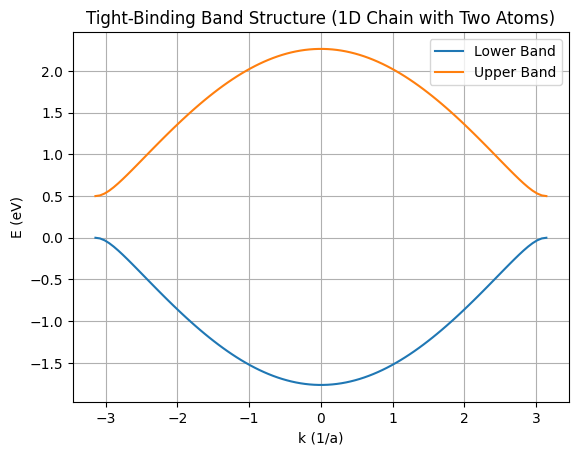

In [2]:
# Parameters
a = 1.0  # lattice constant
epsilon_A = 0.0  # on-site energy for atom A
epsilon_B = 0.5  # on-site energy for atom B
t = 1.0  # hopping parameter
k_points = np.linspace(-np.pi/a, np.pi/a, 100)  # Brillouin zone

# Energy dispersion
cos_term = 4 * t**2 * np.cos(k_points * a / 2)**2
E_plus = (epsilon_A + epsilon_B) / 2 + np.sqrt(((epsilon_A - epsilon_B) / 2)**2 + cos_term)
E_minus = (epsilon_A + epsilon_B) / 2 - np.sqrt(((epsilon_A - epsilon_B) / 2)**2 + cos_term)

# Plot
plt.plot(k_points, E_minus, label='Lower Band')
plt.plot(k_points, E_plus, label='Upper Band')
plt.xlabel('k (1/a)')
plt.ylabel('E (eV)')
plt.title('Tight-Binding Band Structure (1D Chain with Two Atoms)')
plt.legend()
plt.grid(True)
plt.show()

---
## c.

We apply the tight-binding (TB) method to a 1D periodic chain with non-uniform spacing, where each unit cell contains two distinct atoms (A: blue, B: red).
The spacing within the unit cell (A to B) differs from the spacing between unit cells (B to A). We assume one orbital per atom, neglect spin, and consider only nearest-neighbor interactions.


**Lattice Setup**

Lattice constant $ a $, unit cell from $ na $ to $ (n+1)a $.
Atom A at $ na $, atom B at $ na + d $, where $ d < a $ (non-uniform spacing).
Distance A to B within the same cell: $ d $.
Distance B to A in the next cell: $ a - d $.
On-site energies: $\epsilon_A $ for A, $ \epsilon_B $ for B.
Hopping parameters: $t_1$ (A to B within cell), $ t_2 $ (B to A between cells).


**Hamiltonian**

The Hamiltonian is
$$
H = \sum_n \epsilon_A a_n^\dagger a_n + \epsilon_B b_n^\dagger b_n - t_1 \sum_n (a_n^\dagger b_n + b_n^\dagger a_n) - t_2 \sum_n (b_n^\dagger a_{n+1} + a_{n+1}^\dagger b_n).
$$


**Bloch Theorem**

Wavefunction:
$$
\psi_{A,n} = \psi_A e^{ikna},
$$
$$
\psi_{B,n} = \psi_B e^{ik(na + d)}.
$$
Note the phase factor for B due to its position at $ na + d $.

**Schrödinger Equation**:
For atom A in cell $ n $:
$$
\epsilon_A \psi_{A,n} - t_1 \psi_{B,n} - t_2 \psi_{B,n-1} = E \psi_{A,n}.
$$
For atom B in cell $ n $:
$$
\epsilon_B \psi_{B,n} - t_1 \psi_{A,n} - t_2 \psi_{A,n+1} = E \psi_{B,n}.
$$
Substitute Bloch forms:
$$
\epsilon_A \psi_A - t_1 \psi_B e^{ikd} - t_2 \psi_B e^{-ik(a-d)} = E \psi_A,
$$
$$
\epsilon_B \psi_B - t_1 \psi_A e^{-ikd} - t_2 \psi_A e^{ik(a-d)} = E \psi_B.
$$
Matrix form:
$$
\begin{pmatrix}
\epsilon_A - E & -t_1 e^{ikd} - t_2 e^{-ik(a-d)} \\
-t_1 e^{-ikd} - t_2 e^{ik(a-d)} & \epsilon_B - E
\end{pmatrix}
\begin{pmatrix}
\psi_A \\
\psi_B
\end{pmatrix} = 0.
$$



**Energy Dispersion**

Determinant condition:
$$
(\epsilon_A - E)(\epsilon_B - E) - (t_1 e^{ikd} + t_2 e^{-ik(a-d)})(t_1 e^{-ikd} + t_2 e^{ik(a-d)}) = 0.
$$
Simplify the second term:
$$
(t_1 e^{ikd} + t_2 e^{-ik(a-d)})(t_1 e^{-ikd} + t_2 e^{ik(a-d)}) = t_1^2 + t_2^2 + t_1 t_2 (e^{ik(a-2d)} + e^{-ik(a-2d)}) = t_1^2 + t_2^2 + 2 t_1 t_2 \cos(k(a-2d)).
$$
The equation becomes:
$$
(\epsilon_A - E)(\epsilon_B - E) - (t_1^2 + t_2^2 + 2 t_1 t_2 \cos(k(a-2d))) = 0.
$$
Solve for $ E $:
$$
E = \frac{\epsilon_A + \epsilon_B}{2} \pm \sqrt{\left(\frac{\epsilon_A - \epsilon_B}{2}\right)^2 + t_1^2 + t_2^2 + 2 t_1 t_{2} \cos(k(a-2d))}.
$$

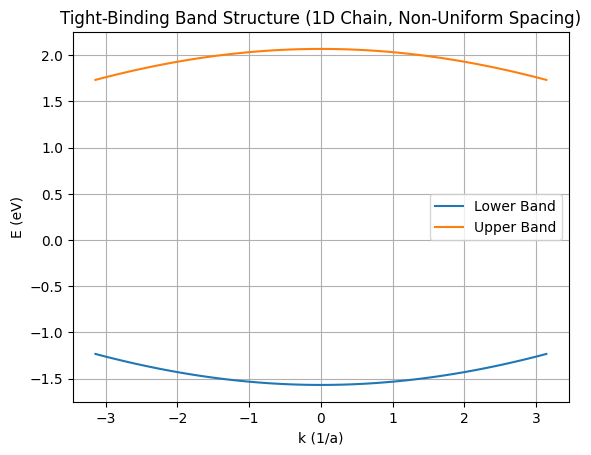

In [3]:
# Parameters
a = 1.0  # lattice constant
d = 0.3  # distance A to B within unit cell
epsilon_A = 0.0  # on-site energy for A
epsilon_B = 0.5  # on-site energy for B
t1 = 1.0  # hopping A to B
t2 = 0.8  # hopping B to A (different due to spacing)
k_points = np.linspace(-np.pi/a, np.pi/a, 100)  # Brillouin zone

# Energy dispersion
cos_term = t1**2 + t2**2 + 2 * t1 * t2 * np.cos(k_points * (a - 2*d))
E_plus = (epsilon_A + epsilon_B) / 2 + np.sqrt(((epsilon_A - epsilon_B) / 2)**2 + cos_term)
E_minus = (epsilon_A + epsilon_B) / 2 - np.sqrt(((epsilon_A - epsilon_B) / 2)**2 + cos_term)

# Plot
plt.plot(k_points, E_minus, label='Lower Band')
plt.plot(k_points, E_plus, label='Upper Band')
plt.xlabel('k (1/a)')
plt.ylabel('E (eV)')
plt.title('Tight-Binding Band Structure (1D Chain, Non-Uniform Spacing)')
plt.legend()
plt.grid(True)
plt.show()

---
# Q2: Group Theorm

## a.

The E(3) group is the Euclidean group in three dimensions, encompassing all rotations and translations in 3D space. It consists of the special orthogonal group SO(3) (rotations) and the translation group T(3), forming a semidirect product $ E(3) = T(3) \rtimes SO(3) $.


**SO(3)** is the special orthogonal group in 3D, representing proper rotations (determinant = +1), is a subgroup of E(3) handling rotational symmetry.\
**O(3)**: is the orthogonal group in 3D includes both proper rotations (SO(3)) and improper rotations (e.g., reflections, determinant = ±1). E(3) extends beyond O(3) by adding translations, while O(3) is a subgroup of E(3) when restricted to rotational and reflection symmetries without translation.


Clebsch-Gordan coefficients are numerical factors used to couple two angular momentum states (e.g., from SO(3) representations) into a combined state, expressing the expansion of a tensor product of irreducible representations into a direct sum of irreducible representations. They are crucial in quantum mechanics for adding angular momenta (e.g., $ j_1 \otimes j_2 \to J $).

---
## b.

**Equivariance Meaning**

In the context of a quantum operator in the atomic orbital basis, **equivariance** under E(3) (Euclidean group in 3D, including rotations and translations) means that the operator transforms consistently under spatial transformations. For a rotation $ R \in SO(3) $, an operator $ \hat{O} $ (represented as a matrix in the orbital basis) is equivariant if it satisfies:
$$
\hat{O} \rightarrow U(R) \hat{O} U(R)^\dagger,
$$
where $ U(R) $ is the unitary representation of the rotation $ R $ in the orbital basis. For p-orbitals, which transform as a vector (angular momentum $ l = 1 $), $ U(R) $ is the 3x3 rotation matrix in the $ \{p_x, p_y, p_z\} $ basis.


**Formula for Equivariance**

Given two operator matrices $ O_1 $ and $ O_2 $, we need to check if they are equivariant under the same transformation. For a rotation $ R $, we transform the direction vector $ \mathbf{vec} $ (defining the interaction direction) and the operator:
$$
\mathbf{vec}' = R \mathbf{vec}, \quad O' = U(R) O U(R)^\dagger.
$$
In this problem, $ O_1 $ and $ O_2 $ represent p-p orbital interaction blocks of an LCAO (Linear Combination of Atomic Orbitals) Hamiltonian, and $ \mathbf{vec} $ is the direction vector between atoms. The hint suggests using spatial rotation to show $ O_1 $ and $ O_2 $ are equivariant, meaning $ O_2 $ can be obtained from $ O_1 $ by a rotation of $ \mathbf{vec} $.


**Step-by-Step Solution**

**Understand the Basis**:
The basis is $ \{p_x, p_y, p_z\} $, so $ O_1 $ and $ O_2 $ are 3x3 matrices.
$ \mathbf{vec} $ specifies the direction of interaction (e.g., between two atoms).


**Interpret $O_1$ and $O_2$**

These matrices represent p-p orbital interactions, typically of the form $ V_{pp\sigma} $ (sigma bonding) and $ V_{pp\pi} $ (pi bonding), depending on the direction $ \mathbf{vec} $.
For a direction $ \mathbf{vec} = (v_x, v_y, v_z) $, the interaction matrix can be written as:
$$
O = V_{pp\sigma} (\mathbf{v} \cdot \mathbf{v}^\top) + V_{pp\pi} (\mathbf{I} - \mathbf{v} \cdot \mathbf{v}^\top),
$$
where $ \mathbf{v} $ is the normalized direction vector, and $ \mathbf{v} \cdot \mathbf{v}^\top $ is the outer product matrix.


**Normalize the Direction Vectors**

$ \mathbf{vec}_1 = (-0.0193, 5.3152, 0.0518) $, magnitude $ |\mathbf{vec}_1| \approx 5.3157 $, so $ \mathbf{v}_1 \approx (-0.0036, 0.9999, 0.0097) $.
$ \mathbf{vec}_2 = (0, 0, 1) $, already normalized.


**Find the Rotation**

We need a rotation $ R $ such that $ R \mathbf{v}_1 = \mathbf{v}_2 $.
$ \mathbf{v}_2 = (0, 0, 1) $, so we rotate $ \mathbf{v}_1 $ to align with the z-axis.
The rotation can be constructed via two angles:
  Azimuthal angle $ \phi $: $ \tan \phi = \frac{v_{1y}}{v_{1x}} \approx \frac{0.9999}{-0.0036} $, so $ \phi \approx \pi + \tan^{-1}(-277.75) \approx 3.1452 $.
  Polar angle $ \theta $: $ \cos \theta = v_{1z} \approx 0.0097 $, so $ \theta \approx \cos^{-1}(0.0097) \approx 1.5611 $.
Rotation matrix $ R = R_z(\phi) R_y(\theta) $:
  $$
  R_y(\theta) = \begin{pmatrix} \cos \theta & 0 & \sin \theta \\ 0 & 1 & 0 \\ -\sin \theta & 0 & \cos \theta \end{pmatrix}, \quad R_z(\phi) = \begin{pmatrix} \cos \phi & -\sin \phi & 0 \\ \sin \phi & \cos \phi & 0 \\ 0 & 0 & 1 \end{pmatrix}.
  $$


**Transform the Operator**

Apply the rotation: $ O_2 = R O_1 R^\top $.
Compare the result with the given $ O_2 $.


In [5]:
# Given matrices and vectors
O1 = np.array([
    [1.32661455e-01, 2.88500622e-03, -5.17760229e-04],
    [6.94089346e-05, -1.87958787e-02, 5.87843933e-04],
    [-7.18132899e-04, 5.75661802e-04, -1.89961633e-02]
])
vec1 = np.array([-0.0193, 5.3152, 0.0518])

O2 = np.array([
    [-0.0188, 0.0006, 0.0005],
    [-0.0006, -0.0190, -0.0007],
    [-0.0023, -0.0005, 0.1327]
])
vec2 = np.array([0, 0, 1])

# Normalize vectors
v1 = vec1 / np.linalg.norm(vec1)
v2 = vec2  # already normalized

# Compute rotation angles
phi = np.arctan2(v1[1], v1[0])
theta = np.arccos(v1[2])

# Rotation matrices
Ry = np.array([
    [np.cos(theta), 0, np.sin(theta)],
    [0, 1, 0],
    [-np.sin(theta), 0, np.cos(theta)]
])
Rz = np.array([
    [np.cos(phi), -np.sin(phi), 0],
    [np.sin(phi), np.cos(phi), 0],
    [0, 0, 1]
])
R = Rz @ Ry

# Transform O1
O1_transformed = R @ O1 @ R.T

# Check if O1_transformed matches O2
print("Transformed O1:\n", O1_transformed)
print("O2:\n", O2)
print("Difference:\n", np.abs(O1_transformed - O2))

Transformed O1:
 [[-1.87915522e-02 -5.87758021e-04  6.64356287e-05]
 [-6.03014768e-04 -1.89981306e-02 -7.59597958e-04]
 [ 2.88272694e-03 -9.49745726e-04  1.32659096e-01]]
O2:
 [[-0.0188  0.0006  0.0005]
 [-0.0006 -0.019  -0.0007]
 [-0.0023 -0.0005  0.1327]]
Difference:
 [[8.44777665e-06 1.18775802e-03 4.33564371e-04]
 [3.01476838e-06 1.86937224e-06 5.95979584e-05]
 [5.18272694e-03 4.49745726e-04 4.09041489e-05]]


---
# <a id='toc1_'></a>[Q3: GNN/MPNN](#toc0_)

## 1.1. <a id='toc1_1_'></a>[a](#toc0_)

Basically, at each layer, the GNN/MPNN model will iteratively extract the information from the previous and current layers and execute the following three updating rules, propagating information from local to global scales to update node and edge representations:

**Step 1. Message Generating**<a id="eq1"></a>

The message $\mathbf{m}^{ij,L}$ integrates the state of the sending node $j$ and the receiving node $i$, along with the edge information $\mathbf{e}^{ij,L-1}$ from their relationship at the previous $(L-1)^{\text{th}}$ layer.
$$
\begin{aligned}
&\boxed{
  \mathbf{m}^{ij,L}
  \;=\;
  M_L
  \left(
    \mathbf{n}^{i,L-1},\,
    \mathbf{n}^{j,L-1},\,
    \mathbf{e}^{ij,L-1}\;\;
  \right)
}\\
&\text{
  $\mathbf{m}^{ij,L}$: Message vector sent from node $j$ to node $i$ at the $L^{\text{th}}$ layer.}\\
&\text{  
  $\mathbf{M_L}$: Learnable message function with parameters specific to layer $L$}\\
&\text{  
  $\mathbf{n}^{i,L-1} \& \mathbf{n}^{j,L-1}$: State (or feature) vectors of nodes $i$ and $j$ at the previous $(L-1)^{\text{th}}$ layer.}\\
&\text{  
  $\mathbf{e}^{ij,L-1}$: State (or feature) vector of the edge between nodes $i$ and $j$ at the previous $(L-1)^{\text{th}}$ layer.}\\
\end{aligned}
\tag{1}
$$
$\mathbf{M_L}$ typically implemented as a neural network (e.g., MLP).

**Step 2. Node Updating**

The updated node state $\mathbf{n}^{i,L}$ is computed by aggregating messages from all neighboring nodes $j$ and combining them with the node's previous state $\mathbf{n}^{i,L-1}$ .
Usually, the operator $U_L$ here is a weighted summation followed by an activation function.
$$
\begin{aligned}
&\boxed{
  \mathbf{n}^{i,L}
  \;=\;
  U_L\!
  \left(
    \mathbf{n}^{i,L-1},\,
    \sum_{j \in \mathcal{N}(i)}
    \mathbf{m}^{ij,L}\;\;
  \right)
}\\
&\text{
  $\mathbf{n}^{i,L}$: Updated state vector of node $i$ at the $L^{\text{th}}$ layer.}\\
&\text{  
  $U_L$: Learnable update function for layer $L$, typically a neural network.}\\
&\text{  
  $\sum_{j \in \mathcal{N}(i)}, \mathbf{m}^{ij,L}$: Sum of messages from all neighbors $j$ in the neighborhood $\mathcal{N}(i)$ of node $i$.}\\
\end{aligned}
$$

**Step 3. Edge Updating**

The current edge state $\mathbf{e}^{ij,L}$ of the edge between $i$ and $j$, $(i,j)$, is updated based on the current states of the connected nodes $i$ and nodes $j$ and their previous edge state.
$$
\begin{aligned}
&\boxed{
  \mathbf{e}^{ij,L}
  \;=\;
  \mathcal{N}_L
  \left(
      \mathbf{n}^{i,L},\,
      \mathbf{n}^{j,L},\,
      \mathbf{e}^{ij,L-1}\,\,
  \right)
}\\
&\text{
  $\mathbf{e}^{ij,L}$: Updated state vector of the edge between nodes $i$ and $j$ at the $L^{\text{th}}$ layer.}\\
&\text{
  $\mathcal{N}_L$: Learnable edge update function for layer $L$, typically a neural network.}\\
&\text{
  $\mathbf{n}^{i,L} \,\&\, \mathbf{n}^{j,L}$: Current state vectors of nodes $i$ and $j$.}\\
&\text{
  $\mathbf{e}^{ij,L-1}$: Previous state vector of the edge at the $(L-1)^{\text{th}}$ layer.}\\
\end{aligned}
$$

---
## b.

In the classical GNN/MPNN model, as the depth of the layers increases, each node gradually aggregates (extracts and stores) information from an expanding set of nodes, potentially reaching all others in the graph through multi-hop propagation, *i.e.*, losing its locality.

However, for a machine learning model like [DeePTB](https://github.com/deepmodeling/DeePTB), to better preserve its locality and achieve a strictly local receptive field, a new parameter $\mathbf{V}$ has been introduced into the previous formula to modulate the scope of information propagation.

The vertex feature associated with the edge between nodes $i$ and $j$ at layer $L$, *i.e.*, $\mathbf{V}^{ij,L}$, is iteratively and strictly updated using information aggregated from the master node $i$ itself via:
$$
\mathbf{V}^{ij,L}
=
\mathcal{V}_L
\left(
  \mathbf{n}^{i,L-1}\;, \;
  \mathbf{V}^{ij,L-1} \;\;
\right),
$$
and this information is then passed into $\mathbf{m}^{ij,L}$ through:
$$
\mathbf{m}^{ij,L}
=
M_L
\left(
  \mathbf{n}^{i,L-1}\;,\;
  \mathbf{V}^{ij,L}\;\;
\right)
$$
rather than incorporating the node state of its neighboring node $j$ at the previous layer ($\mathbf{n}^{j,L-1}\,$ ), as done in eq.[1](#eq1).

This means, unlike the classical GNN/MPNN model, the information stored in node $i$ no longer contains contributions aggregated from its neighboring nodes $j$ and their connected edge $(i,j)$, unless $\mathbf{V}^{ij,L=0} \,\,$  contains the neighboring nodes' feature information.

Instead, this information is collected in the connected edge state $\mathbf{e}^{ij,L}$ via
$$
\mathbf{e}^{ij,L}
\;=\;
\mathcal{N}_L
\left(
  \mathbf{n}^{i,L},\,
  \mathbf{V}^{ij,L},\,
  \mathbf{n}^{j,L},\,
  \mathbf{e}^{ij,L-1}\;\;
\right).
$$

Therefore, the most significant difference between the classical GNN/MPNN and the modified version used in DeePTB lies in the introduction of the $\mathbf{V}^{ij,L}$ term, which enforces the accompanying locality.

---
# c.

**1. Assumptions**

For simplicity we assume $\mathbf{n}^{i,L}$, $\mathbf{V}^{ij,L}$, $\mathbf{m}^{ij,L}$, and $\mathbf{e}^{ij,L}$ are all scalars.

Furthermore, we then use simple linear transformations for $\mathcal{V}_L$, $M_L$, $U_L$, and $\mathcal{N}_L$.

*e.g.*:
$$
\boxed{
\begin{aligned}
\mathcal{V}_L(a, b) &= w_v a + b\\
M_L(a, b) &= w_m a + b\\
U_L(a, b) &= w_u a + b\\
\mathcal{N}_L(a, b, c, d) &= w_e (a + b + c + d)\\
\end{aligned}
}
$$

Here, $w_v, w_m, w_u, w_e$ are learnable weights initialized as 0.5, 0.5, 0.5, and 0.2 respectively.

**2. Layer Construction**

A honeycomb lattice is a two-dimensional hexagonal grid, where each node has $3$ nearest neighbors.

We build a small lattice and use NetworkX to generate the lattice structure, relabeling nodes with consecutive integers for easier indexing.

**3. Code Algorithm**

1. **Lattice Generation**
   - Use `networkx.hexagonal_lattice_graph` to create a 4×4 honeycomb lattice, where each node has 3 nearest neighbors.
   - Nodes are automatically labeled by NetworkX as tuples (e.g., `(i, j, s)`), then remapped to consecutive integers (0 to 47) using a dictionary for compatibility with PyTorch indexing.

2. **Update Formula Implementation**
   - Implement a `DeePTBLayer` class to update $\mathbf{V}^{ij,L}$, $\mathbf{m}^{ij,L}$, $\mathbf{n}^{i,L}$, and $\mathbf{e}^{ij,L}$.
   - All features are scalars; $\mathcal{V}_L$, $M_L$, $U_L$, and $\mathcal{N}_L$ are simplified to linear transformations with learnable weights.
   - The forward pass iterates over edges to compute vertex features, messages, node updates, and edge updates.

3. **Locality Test & Visualization**
   - Pick a center node $i$ (e.g., 15) and a distant node $k$ (e.g., 0) with distance > 1, ensuring $k$ is not within $i$'s nearest neighborhood.
   - **$1_{\text{st}}$ run**: Initialize every node feature to 1.
   - **$2_{\text{nd}}$ run**: Set the distant node $k$'s initial feature to 10.
   - Compare the final feature of the center node $i$ in both runs.
   - Since DeePTB's update formula (single-layer) depends only on nearest neighbors, changes in the distant node $k$ should not affect the center node $i$. This verifies locality.
   - Visualize the lattice using Matplotlib after first run and second run, highlighting the center node (red), distant node (blue), center node's neighbors (green), and other nodes (gray) with node labels.


In [36]:
# 1. Generate honeycomb lattice and map node indices
def generate_honeycomb_lattice(rows, cols):
    G = nx.hexagonal_lattice_graph(rows, cols, periodic=False)
    # Map node indices to consecutive integers
    mapping = {node: idx for idx, node in enumerate(G.nodes)}
    G = nx.relabel_nodes(G, mapping)
    return G

# 2. Visualize honeycomb lattice using Plotly
def visualize_lattice(G,
                      center_node: int,
                      far_node: int,
                      node_features_base,
                      edge_features_base,
                      node_features_modified,
                      edge_features_modified, pos=None):
    # Calculate node positions if not provided
    if pos is None:
        pos = nx.spring_layout(G)

    # Set node colors
    node_colors = ['lightgray'] * len(G.nodes)
    node_colors[center_node] = 'red'  # Center node in red
    node_colors[far_node] = 'blue'    # Far node in blue
    for neighbor in G.neighbors(center_node):
        node_colors[neighbor] = 'green'  # Neighbors of center node in green

    # Extract node coordinates
    x_nodes = [pos[node][0] for node in G.nodes]
    y_nodes = [pos[node][1] for node in G.nodes]

    # Edge coordinates and feature values
    edge_index_map = {edge: idx for idx, edge in enumerate(G.edges)}
    x_edges, y_edges = [], []
    edge_hovertexts_base = []
    edge_hovertexts_modified = []
    for edge in G.edges:
        i, j = edge
        x0, y0 = pos[i]
        x1, y1 = pos[j]
        x_edges.extend([x0, x1, None])  # None to break line segments
        y_edges.extend([y0, y1, None])
        edge_idx = edge_index_map[edge]
        edge_hovertexts_base.append(f"Edge ({i}, {j}): {edge_features_base[edge_idx]:.4f}")
        edge_hovertexts_modified.append(f"Edge ({i}, {j}): {edge_features_modified[edge_idx]:.4f}")

    # Node labels and feature values (shown on hover)
    node_labels_base = [f"Node {i}<br>n_i: {node_features_base[i]:.4f}" for i in G.nodes]
    node_labels_modified = [f"Node {i}<br>n_i: {node_features_modified[i]:.4f}" for i in G.nodes]

    # Create subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=("After First Run", "After Second Run"))

    # Subplot 1: First run
    # Edges
    fig.add_trace(go.Scatter(
        x=x_edges, y=y_edges,
        mode='lines',
        line=dict(color='gray', width=2),
        hoverinfo='text',
        hovertext=edge_hovertexts_base,
        showlegend=False
    ), row=1, col=1)

    # Nodes
    fig.add_trace(go.Scatter(
        x=x_nodes, y=y_nodes,
        mode='markers+text',
        marker=dict(size=10, color=node_colors),
        text=[str(i) for i in G.nodes],
        textposition="top center",
        hoverinfo='text',
        hovertext=node_labels_base,
        showlegend=False
    ), row=1, col=1)

    # Subplot 2: Second run
    # Edges
    fig.add_trace(go.Scatter(
        x=x_edges, y=y_edges,
        mode='lines',
        line=dict(color='gray', width=2),
        hoverinfo='text',  # Show info on hover
        hovertext=edge_hovertexts_modified,
        showlegend=False
    ), row=1, col=2)

    # Nodes
    fig.add_trace(go.Scatter(
        x=x_nodes, y=y_nodes,
        mode='markers+text',
        marker=dict(size=10, color=node_colors),
        text=[str(i) for i in G.nodes],
        textposition="top center",
        hoverinfo='text',  # Show info on hover
        hovertext=node_labels_modified,
        showlegend=False
    ), row=1, col=2)

    # Update layout
    fig.update_layout(
        title_text="Honeycomb Lattice: Center Node (Red), Far Node (Blue), Neighbors (Green)",
        width=1200,
        height=600,
        showlegend=False
    )
    fig.update_xaxes(showgrid=False, zeroline=False, showticklabels=False)
    fig.update_yaxes(showgrid=False, zeroline=False, showticklabels=False)

    fig.show()

# 3. DeePTB update module
class DeePTBLayer(nn.Module):
    def __init__(self):
        super(DeePTBLayer, self).__init__()
        # Simple linear transformation weights
        self.w_v = nn.Parameter(torch.tensor(0.5))  # V update weight
        self.w_m = nn.Parameter(torch.tensor(0.5))  # Message generation weight
        self.w_u = nn.Parameter(torch.tensor(0.5))  # Node update weight
        self.w_e = nn.Parameter(torch.tensor(0.2))  # Edge update weight

    def forward(self, G, node_features, vertex_features, edge_features):
        # node_features: [num_nodes], vertex_features: [num_edges], edge_features: [num_edges]
        num_nodes = len(G.nodes)
        num_edges = len(G.edges)
        new_node_features = torch.zeros(num_nodes)
        new_vertex_features = torch.zeros(num_edges)
        new_edge_features = torch.zeros(num_edges)

        # Map edges to indices
        edge_index_map = {edge: idx for idx, edge in enumerate(G.edges)}

        # Step 1: Update vertex feature V_ij,L
        for edge in G.edges:
            i, j = edge
            edge_idx = edge_index_map[edge]
            # V_ij,L = V_L(n_i,L-1, V_ij,L-1)
            new_vertex_features[edge_idx] = self.w_v * node_features[i] + vertex_features[edge_idx]

        # Step 2: Generate message m_ij,L
        messages = torch.zeros(num_nodes, num_nodes)  # Message matrix
        for edge in G.edges:
            i, j = edge
            edge_idx = edge_index_map[edge]
            # m_ij,L = M_L(n_i,L-1, V_ij,L)
            messages[i, j] = self.w_m * node_features[i] + new_vertex_features[edge_idx]

        # Step 3: Update node n_i,L
        for i in G.nodes:
            # Aggregate messages from neighbors
            message_sum = sum(messages[i, j] for j in G.neighbors(i) if (i, j) in G.edges)
            # n_i,L = U_L(n_i,L-1, sum(m_ij,L))
            new_node_features[i] = self.w_u * node_features[i] + message_sum

        # Step 4: Update edge e_ij,L
        for edge in G.edges:
            i, j = edge
            edge_idx = edge_index_map[edge]
            # e_ij,L = N_L(n_i,L, V_ij,L, n_j,L, e_ij,L-1)
            new_edge_features[edge_idx] = self.w_e * (
                new_node_features[i] + new_vertex_features[edge_idx] +
                new_node_features[j] + edge_features[edge_idx]
            )

        return new_node_features, new_vertex_features, new_edge_features

# 4. Test locality
def test_locality(center_node: int, far_node: int):
    # Generate 4x4 honeycomb lattice
    G = generate_honeycomb_lattice(4, 4)
    num_nodes = len(G.nodes)
    num_edges = len(G.edges)

    # Print node and edge information
    print(f"Nodes in graph: {list(G.nodes)}")
    print(f"Number of nodes: {num_nodes}, Number of edges: {num_edges}")

    # Initialize features (scalars)
    node_features = torch.ones(num_nodes)  # n_i = 1
    vertex_features = torch.zeros(num_edges)  # V_ij = 0
    edge_features = torch.zeros(num_edges)  # e_ij = 0

    # Verify that far node is not in center node's nearest neighbors
    neighbors = list(G.neighbors(center_node))
    print(f"Neighbors of center node {center_node}: {neighbors}")
    assert far_node not in neighbors, f"Far node {far_node} is a neighbor of {center_node}!"

    # Number of layers
    num_layers = 1  # Test only one layer to ensure nearest neighbor locality

    # Model
    model = DeePTBLayer()

    # Calculate layout
    pos = nx.spring_layout(G)

    # First run: baseline
    node_features_base = node_features.clone()
    vertex_features_base = vertex_features.clone()
    edge_features_base = edge_features.clone()
    for _ in range(num_layers):
        node_features_base, vertex_features_base, edge_features_base = model(
            G, node_features_base, vertex_features_base, edge_features_base
        )

    # Second run: change far node k's initial value
    node_features_modified = node_features.clone()
    node_features_modified[far_node] = 10.0  # Change far node feature
    vertex_features_modified = vertex_features.clone()
    edge_features_modified = edge_features.clone()
    for _ in range(num_layers):
        node_features_modified, vertex_features_modified, edge_features_modified = model(
            G, node_features_modified, vertex_features_modified, edge_features_modified
        )

    # Visualize first and second run results
    visualize_lattice(G, center_node, far_node, node_features_base, edge_features_base,
                     node_features_modified, edge_features_modified, pos=pos)

    # Verify that center node i remains unchanged
    print(f"Center node {center_node} feature (base): {node_features_base[center_node]:.4f}")
    print(f"Center node {center_node} feature (modified): {node_features_modified[center_node]:.4f}")
    assert torch.allclose(node_features_base[center_node], node_features_modified[center_node], atol=1e-5), \
        "Center node feature changed, locality not preserved!"

    print("Locality test passed: Center node feature is invariant to changes outside the receptive field.")

In [45]:
# EXE
if __name__ == "__main__":
    test_locality(center_node=23, far_node=13)

Nodes in graph: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
Number of nodes: 48, Number of edges: 63
Neighbors of center node 23: [22, 24, 33]


Center node 23 feature (base): 2.5000
Center node 23 feature (modified): 2.5000
Locality test passed: Center node feature is invariant to changes outside the receptive field.


**Result Analysis**  

When changing the mode state of `far_node' (node $k$ outside of the receptive field) $\mathbf{n}A^{k=13,L-1}$ from 1.5 tp 15, the node state of the center node $i$ $\mathbf{n}A^{k=23,L}$ remains 2.5 unchanged after 1 iteration.

This confirms that the DeePTB update framework is invariant to changes outside the nearest-neighbor range, satisfying strict locality.

---
## d.

The traditional approach to GNN training often involves storing an adjacency matrix:
$$
E
=
\left( e^{ij} \right)_{1 \leq i, j \leq n-1} \;\;
=
\begin{bmatrix}
e^{00} & e^{01} & \dots & e^{0,n-1} \\
e^{10} & e^{11} & \dots & e^{1,n-1} \\
\vdots &        &       & \vdots \\
e^{n0} & e^{n1} & \dots & e^{n,n-1}
\end{bmatrix}
$$
which contains edge state information $\mathbf{e}^{ij}$ for all nodes $i$ and $j$.

Given the large number of nodes $n$, $E$ is typically a massive and sparse matrix, often leading to out-of-memory issues on a single device. While an adjacency list is an alternative, it can also cause problems as the feature tensor length increases.

As the number of iterations increases, the layer depth grows, and local information from each node gradually propagates to a global scale. This requires loading the entire adjacency matrix (or adjacency list) at once, incurring a space complexity of $\mathcal{O}(n^2)$ (or $\mathcal{O}(n \cdot d)$ for an adjacency list, where $d$ is the number of edges).

In contrast, DeePTB operates differently due to its strict locality, where the number of adjacent neighbor nodes $j \in N(i)$ is limited and controlled. This reduces the space complexity to $\mathcal{O}(n \cdot k)$, where $k$ is the number of neighboring nodes within the receptive field (e.g., $k = 3$ for a honeycomb lattice).

For achieving parallelism, we can:


1. **Graph Partitioning**  
   - Divide graph \( G \) into \( P \) subgraphs using an algorithm like METIS, minimizing cut edges.  
   - Assign each subgraph \( G_i \) to a device.

2. **Boundary & Halo Management**  
   - Identify boundary nodes \( B_i \) in \( G_i \) (nodes linked to other subgraphs).  
   - Create a halo region per subgraph, including boundary nodes from neighbors.

3. **Parallel Inference**  
   - Each device computes GNN updates for its subgraph using local and halo node features.  
   - After each layer, exchange updated boundary features with neighboring devices.

4. **Optimization**  
   - Use non-blocking communication (e.g., MPI) to overlap computation and data transfer.  
   - Limit communication to boundary features.


**Pseudocode (C++-like)**
```cpp
void multi_device_inference(Graph G, int num_devices) {
    // Partition graph
    auto partitions = partition_graph(G, num_devices);
    Subgraph G_i = partitions[my_rank];
    auto B_i = get_boundary_nodes(G_i, partitions);
    auto halo = get_halo_nodes(B_i, partitions);

    // GNN inference loop
    for each layer in GNN {
        compute_local_updates(G_i, node_features, edge_features);
        for each neighbor_device {
            send_boundary_features(neighbor_device, B_i);
            recv_halo_features(neighbor_device, halo);
        }
        wait_for_communication();
    }
}
```

**Vital Difficulties**

Since the way of connection of GNN is random and fully customized, unlike topology such as binary tree or dragonfly, Graph in GNN is very difficult to come up with a generally and reliable mapping method to map from the source topology (Graph) to the target topology (*e.g.*, hypercubic).
Therefore, parallelization will face fatal problems such as  load balancing, communication lag, and synchronization.
